In [1]:
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import shutil
import pandas as pd

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

### **Data Preparation**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Copy the train data to colab storage to read the image faster in next step

import shutil

# Define the source and destination paths
source_folder = '/content/drive/My Drive/DSBA data/DSBA_S3/Deep Learning/kvasir_12k/aug_images/'
destination_folder = '/content/kvasir_image'

# Copy the entire folder,  overwriting the destination if it exists
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

'/content/kvasir_image'

In [4]:
X = np.zeros((12000, 256, 256, 3), dtype=np.uint8)
images_path = '/content/kvasir_image'

for n,img in enumerate(os.listdir(images_path)):
    file_path = os.path.join(images_path, img)
    image = imread(file_path)
    image = resize(image, (256, 256), mode="constant", preserve_range=True)
    X[n] = image

In [5]:
# Copy the train data to colab storage to read the image faster in next step

import shutil

# Define the source and destination paths
source_folder = '/content/drive/My Drive/DSBA data/DSBA_S3/Deep Learning/kvasir_12k/aug_masks/'
destination_folder = '/content/kvasir_mask'

# Copy the entire folder,  overwriting the destination if it exists
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

'/content/kvasir_mask'

In [6]:
y = np.zeros((12000, 256, 256, 1), dtype=np.bool_)
mask_path = '/content/kvasir_mask'

for n,mask in enumerate(os.listdir(mask_path)):
    file_path = os.path.join(mask_path, mask)
    mask = imread(file_path)
    mask = rgb2gray(mask)
    mask = np.expand_dims(resize(mask, (256, 256), mode="constant", preserve_range=True), axis=-1)
    y[n] = mask

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"X_train.shape: {X_train.shape}\ny_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}\ny_test.shape: {y_test.shape}")

X_train.shape: (9000, 256, 256, 3)
y_train.shape: (9000, 256, 256, 1)
X_test.shape: (3000, 256, 256, 3)
y_test.shape: (3000, 256, 256, 1)


### **Call Out The Models**

**Ori Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras

# function to create iou coefficient
def iou_coef(y_true, y_pred, smooth=100):
    y_true = tf.cast(y_true, dtype=tf.float32) # Cast y_true to float32
    y_pred = tf.cast(y_pred, dtype=tf.float32) # Cast y_pred to float32
    intersection = K.sum(y_true * y_pred)
    sum = K.sum(y_true + y_pred)
    iou = (intersection + smooth) / (sum - intersection + smooth)
    return iou


# Load the model without compiling
ori = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/saved_models/kvasir3_epoch20.hdf5', compile=False)
# Compile the model with the desired optimizer
ori.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', iou_coef])

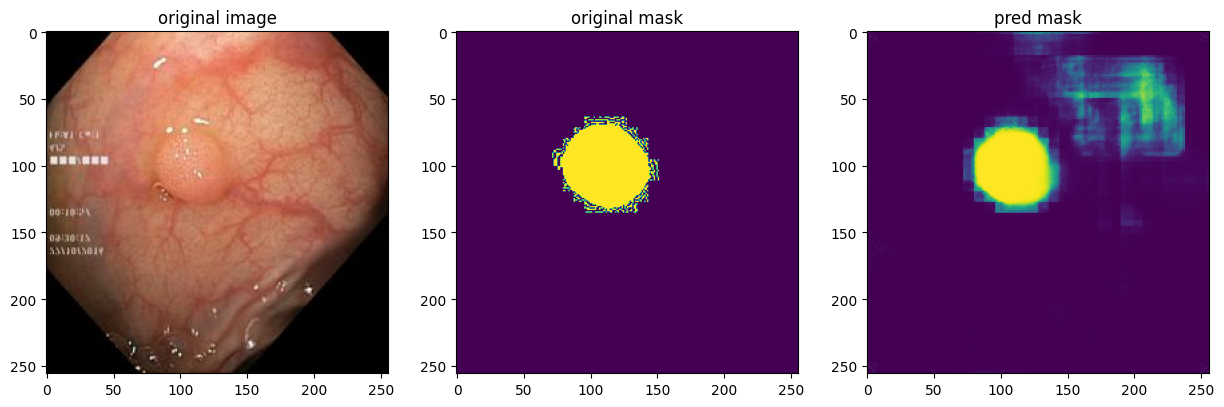

In [10]:
ind = 1
img = X_test[ind]
predMask = ori.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))

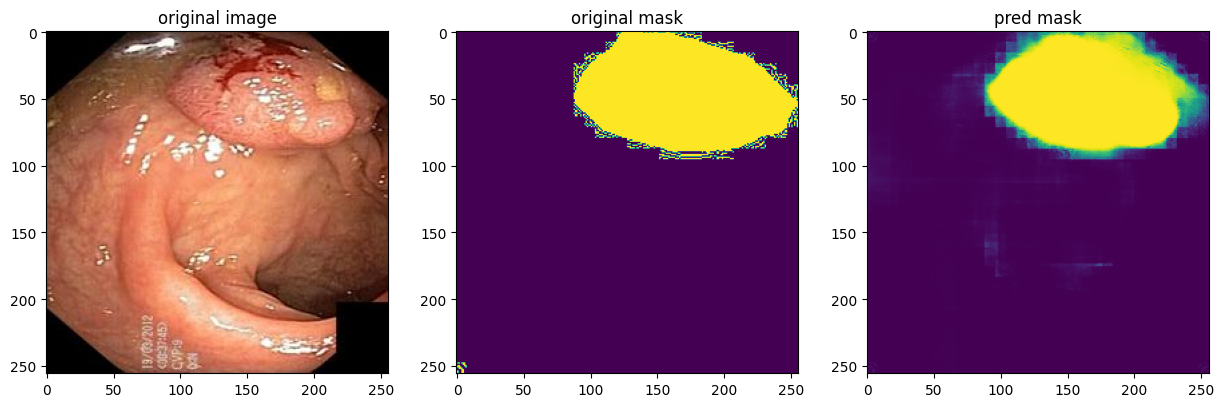

In [11]:
ind = 11
img = X_test[ind]
predMask = ori.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))

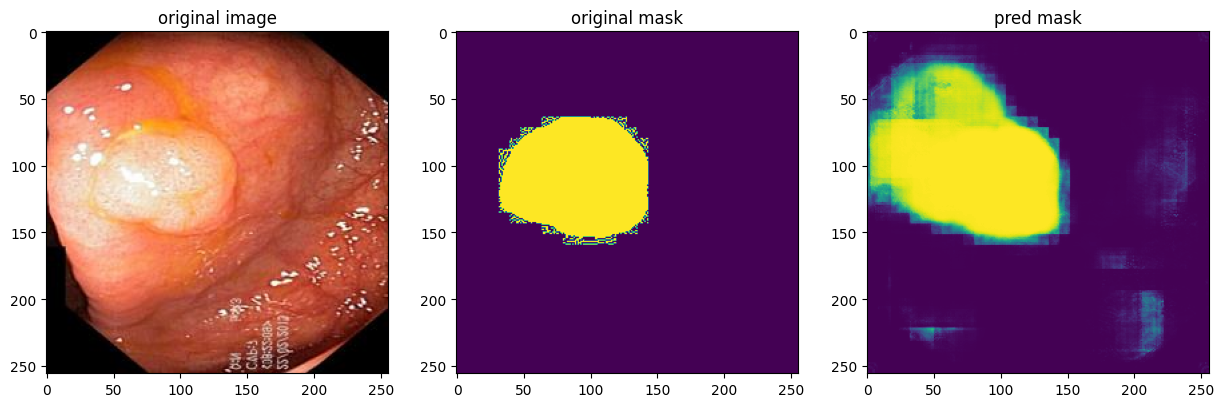

In [13]:
ind = 1111
img = X_test[ind]
predMask = ori.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))

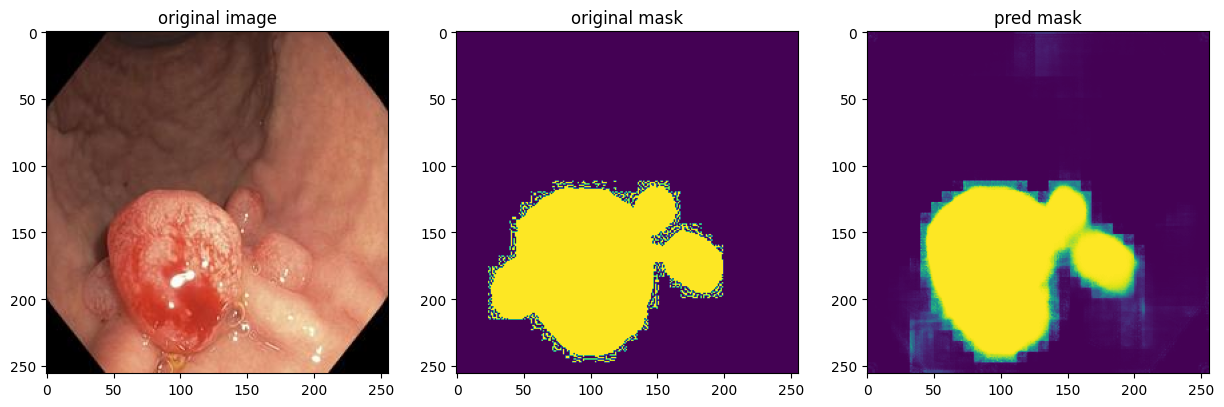

In [58]:
ind = 123
img = X_test[ind]
predMask = ori.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))

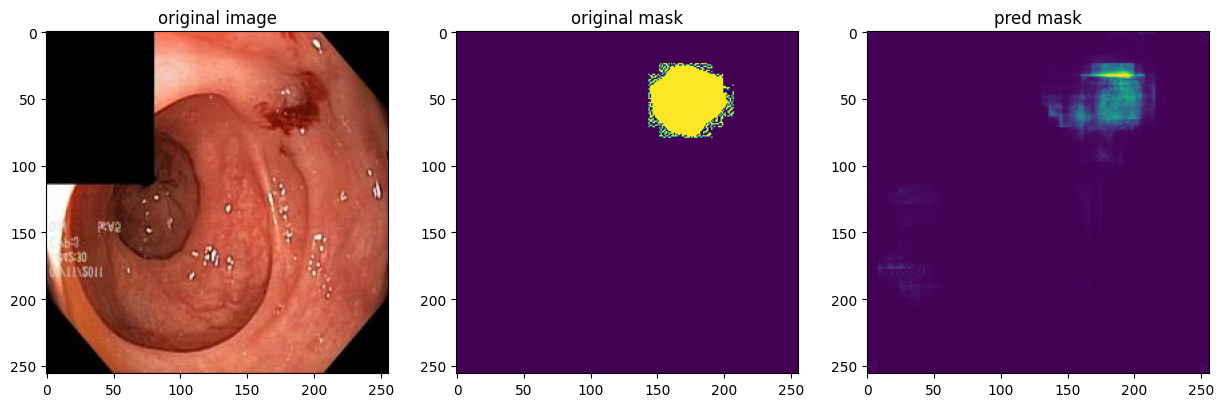

In [60]:
ind = 999
img = X_test[ind]
predMask = ori.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))

### **Ori_Tuned**

In [14]:
# Load the model without compiling
ori_tuned = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/saved_models/kvasir3_epoch20_tuned.hdf5', compile=False)
# Compile the model with the desired optimizer
ori_tuned.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', iou_coef])

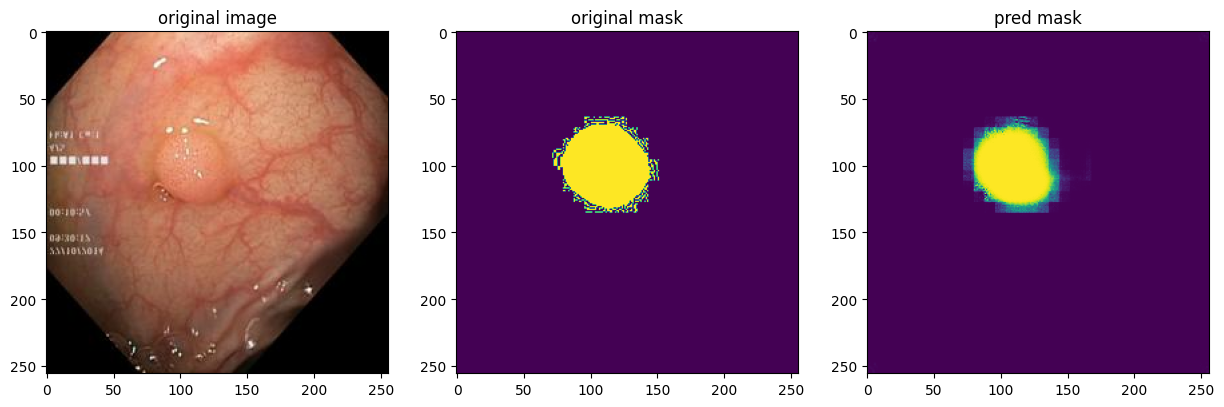

In [15]:
ind = 1
img = X_test[ind]
predMask = ori_tuned.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))

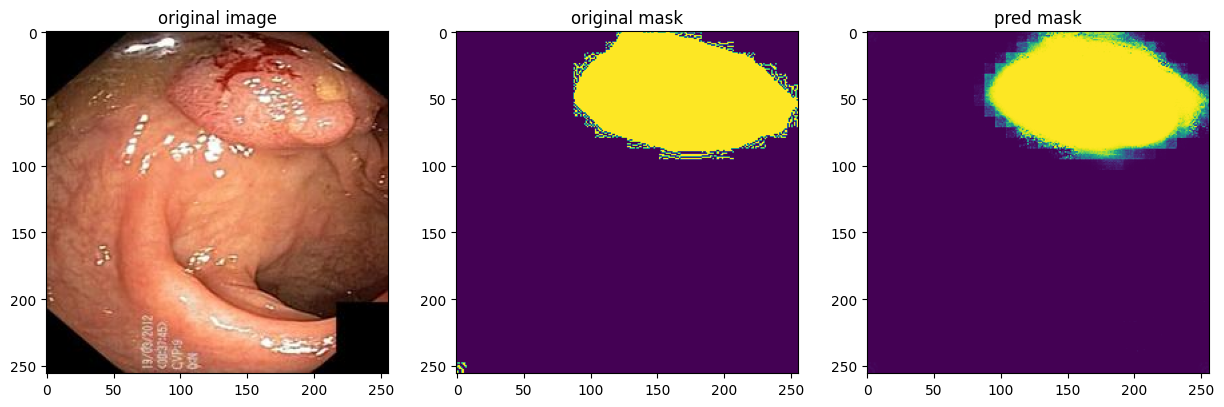

In [16]:
ind = 11
img = X_test[ind]
predMask = ori_tuned.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))

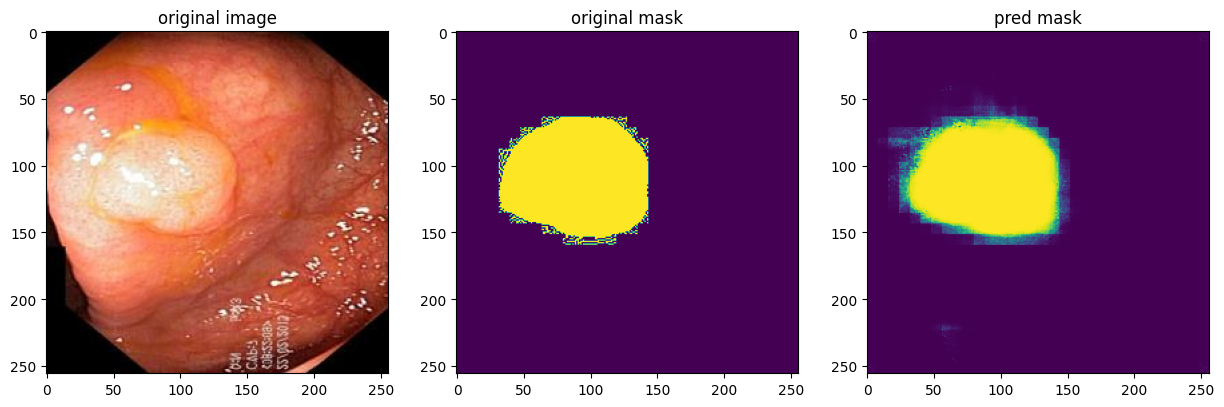

In [17]:
ind = 1111
img = X_test[ind]
predMask = ori_tuned.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))

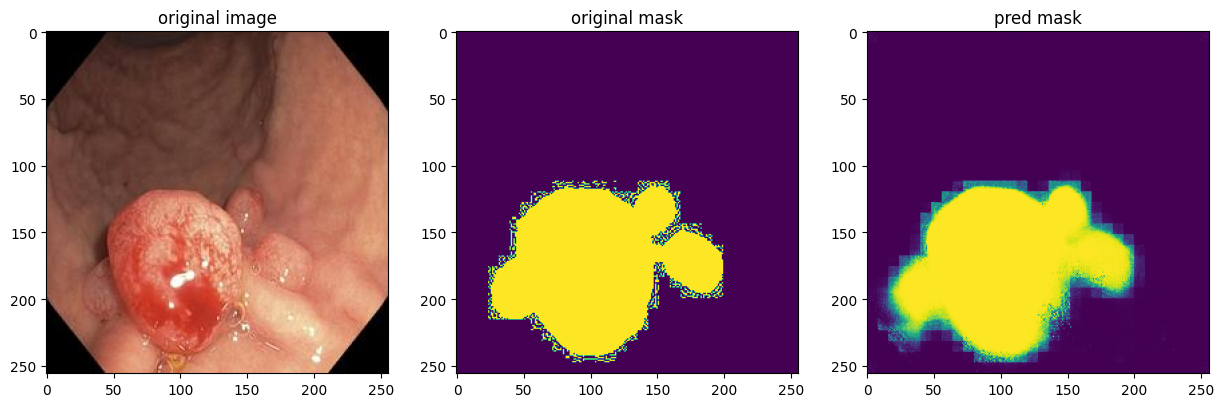

In [61]:
ind = 123
img = X_test[ind]
predMask = ori_tuned.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))

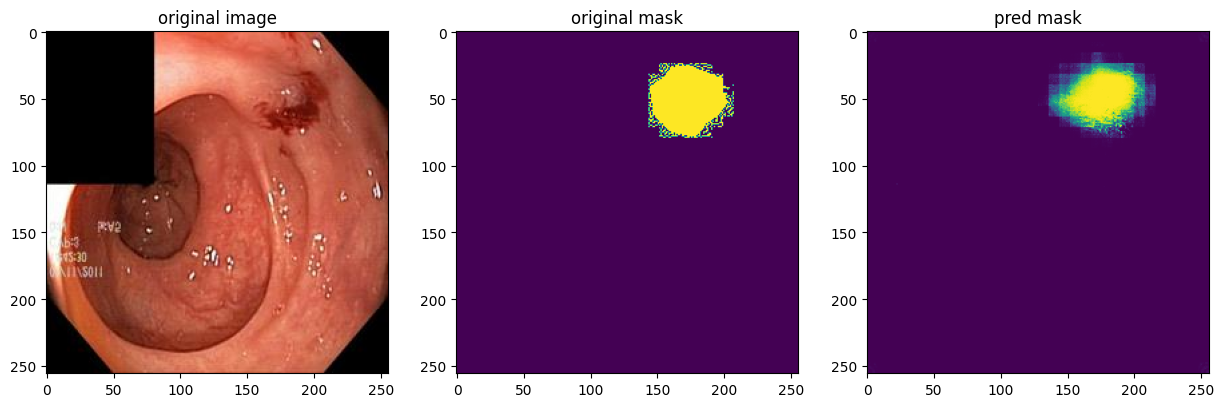

In [62]:
ind = 999
img = X_test[ind]
predMask = ori_tuned.predict(np.expand_dims(img, axis=0), verbose=0)
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("original image")
ax1.imshow(X_test[ind])
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("original mask")
ax2.imshow(np.squeeze(y_test[ind]))
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("pred mask")
ax3.imshow(np.squeeze(predMask))